In [ ]:
#Import libraries
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from numpy import load

import os
import numpy as np
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [ ]:

import tensorflow as tf
print(tf.__version__)

2.1.0


In [ ]:
#Install tensorflow==2.1.0
#!pip install tensorflow==2.1.0

In [ ]:
#!python -c 'import tensorflow as tf; print(tf.__version__)'

In [ ]:
#Mounting with Google drive to reterive the data
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## **Making .npy file**

In [ ]:
'''print('INFO: reading benign images')
benign_path = '/content/gdrive/My Drive/Adverserial_ML/AndroZoo/APKs_and_Images/Benign_Images/Androguard_and_PreDefined_Values/Benign_Images_16K_Onwards/'
print(len(os.listdir(benign_path)))
benign_imgs = []
images_data = []
count=0
for img in os.listdir(benign_path):
  benign_imgs.append(plt.imread(benign_path + img))
  count+=1
  if(count%500==0):
    print(count)
benign_imgs = np.array(benign_imgs)
#benign_imgs = benign_imgs[:4200]
'''
print('INFO: reading malware images')
malware_path = '/content/gdrive/My Drive/Adverserial_ML/AndroZoo/APKs_and_Images/Malware_Images/Androguard_and_PreDefined_Values/Malware_Images_geq15l35/'
print(len(os.listdir(malware_path)))
malware_imgs = []
count = 0
for img in os.listdir(malware_path):
  malware_imgs.append(plt.imread((malware_path + img)))
  count+=1
  if(count%500==0):
    print(count)
malware_imgs = np.array(malware_imgs)
#malware_imgs = malware_imgs[:4200]'''

In [ ]:
np.save('/content/gdrive/My Drive/Adverserial_ML/AndroZoo/APKs_and_Images/Malware_Images/Androguard_and_PreDefined_Values/XMalware_geq15l35.npy', malware_imgs)

In [ ]:
# load numpy array from npy file

benign_imgs_4K = load('/content/gdrive/My Drive/Adverserial_ML/AndroZoo/APKs_and_Images/Benign_Images/Androguard_and_PreDefined_Values/XBenign_4K.npy')
print(benign_imgs_4K.shape)
benign_4k_16K = load('/content/gdrive/My Drive/Adverserial_ML/AndroZoo/APKs_and_Images/Benign_Images/Androguard_and_PreDefined_Values/XBenign_4k_16K.npy')
print(benign_4k_16K.shape)
benign_16k_onward = load('/content/gdrive/My Drive/Adverserial_ML/AndroZoo/APKs_and_Images/Benign_Images/Androguard_and_PreDefined_Values/XBenign_16K_Onwards.npy')
print(benign_16k_onward.shape)

(4003, 64, 64, 3)
(11788, 64, 64, 3)
(13382, 64, 64, 3)


Reaading different bening and malware images

In [ ]:
#benign_18k = load('/content/gdrive/My Drive/Adverserial_ML/AndroZoo/APKs_and_Images/Benign_Images/Androguard_and_PreDefined_Values/Inter_Linear/Ben_imgs_12K_16K_+_16K_onwards_interLinear.npy')
#print(benign_18k.shape)

(17337, 64, 64, 3)


In [ ]:
#malware_imgs_31K = load('/content/gdrive/My Drive/Adverserial_ML/AndroZoo/APKs_and_Images/Malware_Images/Androguard_and_PreDefined_Values/XMalware_geq15l35.npy')
#print(malware_imgs_31K.shape)
#malware_imgs_4K_22K = load('/content/gdrive/My Drive/Adverserial_ML/AndroZoo/APKs_and_Images/Malware_Images/Androguard_and_PreDefined_Values/XMalware_4k_22K_geq35.npy')
#print(malware_imgs_4K_22K.shape)

(31299, 64, 64, 3)
(17962, 64, 64, 3)


In [ ]:
#malware_18k = load('/content/gdrive/My Drive/Adverserial_ML/AndroZoo/APKs_and_Images/Malware_Images/Androguard_and_PreDefined_Values/Inter_Linear/18K/Malware_images_2016_2012_18K_geq15_InterLinear.npy')
#print(malware_18k.shape)

(18109, 64, 64, 3)


In [ ]:
#Xbenign = np.concatenate((benign_imgs_4K[:4000], benign_4k_16K[:11700], benign_16k_onward[:13300]), axis=0)
#Xmalware = np.concatenate((malware_imgs_4K_22K[:12000], malware_imgs_31K[:17000]), axis=0)
#Xmalware = np.concatenate((malware_imgs, malware_imgs_4K), axis=0)
#print(Xbenign.shape)
#print(Xmalware.shape)

(29000, 64, 64, 3)
(29000, 64, 64, 3)


In [ ]:
#only using 17300 images for model training
Xbenign = benign_18k[:17300]
Xmalware = malware_18k[:17300]

In [ ]:
#Rough work
'''img1 = m_img[0]
print(img1.shape[2])
img2 = malware_imgs[0]
print(img2.shape)
count = 0
for c in range(img1.shape[2]):
  for i in range(img1.shape[1]):
    for j in range(img1.shape[0]):
      if(img1[i,j,c] == img2[i,j,c]):
        count+=1

print(count)'''

3
(64, 64, 3)
12288


In [ ]:
#stacking both bening and malware images in one array
images_data = np.vstack([Xbenign, Xmalware])
print(images_data.shape)

(34600, 64, 64, 3)


In [ ]:

# making of labels(Y)
benign_Y = np.zeros(Xbenign.shape[0], dtype=np.int32)
malware_Y = np.ones(Xmalware.shape[0], dtype=np.int32)
Y = np.hstack((benign_Y, malware_Y))

In [ ]:
print(Y.shape)acc
print(Y)

(34600,)
[0 0 0 ... 1 1 1]


**Normalization**

In [ ]:
images_data = images_data/255.0

In [ ]:
#rough work
#history = model.fit_generator(aument.flow(X_train, Y_train, batch_size=64),
#                              steps_per_epoch=len(X_train))//64, epochs=20

In [ ]:
#splitting data into training, test and validation sets
trainX, testX, trainY, testY = train_test_split(images_data, Y, test_size=0.20)
trainX, valX, trainY, valY = train_test_split(trainX, trainY, test_size=0.20)
#trainX, trainY, testX, testY

In [ ]:
#rough work
'''trainX, testX, trainY, testY = train_test_split(images_data, Y, test_size=0.20)
trainX, valX, trainY, valY = train_test_split(trainX, trainY, test_size=0.20)

np.save('/content/gdrive/My Drive/Adverserial_ML/AndroZoo/APKs_and_Images/Malware_Images/Androguard_and_PreDefined_Values/Inter_Linear/11K_2020_19_18_17/Simple_model/trainX.npy', trainX)
np.save('/content/gdrive/My Drive/Adverserial_ML/AndroZoo/APKs_and_Images/Malware_Images/Androguard_and_PreDefined_Values/Inter_Linear/11K_2020_19_18_17/Simple_model/testX.npy', testX)
np.save('/content/gdrive/My Drive/Adverserial_ML/AndroZoo/APKs_and_Images/Malware_Images/Androguard_and_PreDefined_Values/Inter_Linear/11K_2020_19_18_17/Simple_model/trainY.npy', trainY)
np.save('/content/gdrive/My Drive/Adverserial_ML/AndroZoo/APKs_and_Images/Malware_Images/Androguard_and_PreDefined_Values/Inter_Linear/11K_2020_19_18_17/Simple_model/testY.npy', testY)
np.save('/content/gdrive/My Drive/Adverserial_ML/AndroZoo/APKs_and_Images/Malware_Images/Androguard_and_PreDefined_Values/Inter_Linear/11K_2020_19_18_17/Simple_model/valX.npy', valX)
np.save('/content/gdrive/My Drive/Adverserial_ML/AndroZoo/APKs_and_Images/Malware_Images/Androguard_and_PreDefined_Values/Inter_Linear/11K_2020_19_18_17/Simple_model/valY.npy', valY)
'''

In [ ]:
#building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='valid', data_format='channels_last', dilation_rate=(1, 1), activation='relu', use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='Zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None))
model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='valid', data_format='channels_last', dilation_rate=(1, 1), activation='relu', use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='Zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None))
model.add(MaxPooling2D(pool_size=(2, 2), padding='valid', strides=(2, 2), data_format='channels_last'))
model.add(Dropout(rate=0.25, noise_shape=None, seed=None))
model.add(Flatten(data_format='channels_last'))
model.add(Dropout(rate=0.50, noise_shape=None, seed=None))
model.add(Dense(units=1, activation='linear', use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='Zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None))
model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
#compile the model
from keras.optimizers import SGD, adam
opti = adam(lr=0.0001)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#train the model
#history = model.fit_generator(augmnt.flow(X_train, Y_train, batch_size=64),
#                              steps_per_epoch=len(X_train)//64, epochs=20)
history_11k = model.fit(trainX, trainY, validation_data=(valX, valY), batch_size=64, epochs=100)

Train on 14336 samples, validate on 3584 samples
Epoch 1/100
14336/14336 [==============================] - 129s 9ms/step - loss: 0.3992 - accuracy: 0.8103 - val_loss: 0.2818 - val_accuracy: 0.8887
Epoch 2/100
14336/14336 [==============================] - 130s 9ms/step - loss: 0.2378 - accuracy: 0.9051 - val_loss: 0.1744 - val_accuracy: 0.9336
Epoch 3/100
14336/14336 [==============================] - 117s 8ms/step - loss: 0.1513 - accuracy: 0.9410 - val_loss: 0.1434 - val_accuracy: 0.9445
Epoch 4/100
14336/14336 [==============================] - 118s 8ms/step - loss: 0.1163 - accuracy: 0.9551 - val_loss: 0.1142 - val_accuracy: 0.9584
Epoch 5/100
14336/14336 [==============================] - 114s 8ms/step - loss: 0.0957 - accuracy: 0.9639 - val_loss: 0.0882 - val_accuracy: 0.9646
Epoch 6/100
14336/14336 [==============================] - 116s 8ms/step - loss: 0.0847 - accuracy: 0.9674 - val_loss: 0.0845 - val_accuracy: 0.9654
Epoch 7/100
14336/14336 [==============================] 

In [ ]:
print(history.history)
# history_12K interLinear

{'val_loss': [0.212986234202981, 0.14355701220532258, 0.1181374603882432, 0.09846986023088296, 0.0899189512245357, 0.09186464698674777, 0.1199509606231004, 0.08018935507473847, 0.07836131209818026, 0.07284023845568299, 0.09994354778900742, 0.07108994520579776, 0.07179145238672693, 0.08423279517640671, 0.06997729713718097, 0.06690448706503957, 0.07760306277001898, 0.06518421329868336, 0.06764974896019946, 0.06907714530049512, 0.0677864138308602, 0.06357362796067416, 0.07406613153871149, 0.05679147106905778, 0.05860564043008101, 0.060797627782449126, 0.07445385327252249, 0.07954043458254698, 0.06668155106793468, 0.06768561601832819, 0.08675081522475618, 0.06787417333689519, 0.06754757520393469, 0.06442864005803131, 0.07399272451802971, 0.06089192124879143, 0.06132746050134301, 0.08021699411813946, 0.07678973386549236, 0.08032502145700467, 0.07800669293307388, 0.08097963825906239, 0.07847526004479732, 0.09168146530573722, 0.0660386582982028, 0.0851808040162723, 0.06800197594760296, 0.0787

In [ ]:
#evaluate the model
model.evaluate(testX, testY)

4480/4480 [==============================] - 10s 2ms/step


[0.05752936021438005, 0.9877232313156128]

In [ ]:
#Pridictions for testX
predictions = model.predict(testX)

In [ ]:
#print(predictions.shape)
#print(np.count_nonzero(predictions))
#print(predictions)

(1680, 1)
1680
[[0.04864392]
 [0.9569856 ]
 [0.981392  ]
 ...
 [0.83342457]
 [0.676535  ]
 [0.27230024]]


In [ ]:
#model.evaluate(testX, testY)
#model.evaluate_generator(X_test, steps=X_test.shape[0])

#from sklearn.metrics import classification_report
#print(classification_report(Y_test, predictions))

7070/7070 [==============================] - 16s 2ms/step


[0.19449003752336813, 0.9356435537338257]

**Auto-Keras:**
To check performace on differnt arhitecture

In [ ]:
!pip install autokeras

In [ ]:
# import the necessary packages
from sklearn.metrics import classification_report
import autokeras as ak
import os

In [ ]:
#rough work
#trainX, testX, trainY, testY = train_test_split(images_data, Y, test_size=0.20)
#trainX, valX, trainY, valY = train_test_split(trainX, trainY, test_size=0.20)
'''
np.save('/content/gdrive/My Drive/Adverserial_ML/AndroZoo/APKs_and_Images/Malware_Images/Androguard_and_PreDefined_Values/Inter_Linear/11K_2020_19_18_17/Simple_model/trainX.npy', trainX)
np.save('/content/gdrive/My Drive/Adverserial_ML/AndroZoo/APKs_and_Images/Malware_Images/Androguard_and_PreDefined_Values/Inter_Linear/11K_2020_19_18_17/Simple_model/testX.npy', testX)
np.save('/content/gdrive/My Drive/Adverserial_ML/AndroZoo/APKs_and_Images/Malware_Images/Androguard_and_PreDefined_Values/Inter_Linear/11K_2020_19_18_17/Simple_model/trainY.npy', trainY)
np.save('/content/gdrive/My Drive/Adverserial_ML/AndroZoo/APKs_and_Images/Malware_Images/Androguard_and_PreDefined_Values/Inter_Linear/11K_2020_19_18_17/Simple_model/testY.npy', testY)
np.save('/content/gdrive/My Drive/Adverserial_ML/AndroZoo/APKs_and_Images/Malware_Images/Androguard_and_PreDefined_Values/Inter_Linear/11K_2020_19_18_17/Simple_model/valX.npy', valX)
np.save('/content/gdrive/My Drive/Adverserial_ML/AndroZoo/APKs_and_Images/Malware_Images/Androguard_and_PreDefined_Values/Inter_Linear/11K_2020_19_18_17/Simple_model/valY.npy', valY)
#'''

"\nnp.save('/content/gdrive/My Drive/Adverserial_ML/AndroZoo/APKs_and_Images/Malware_Images/Androguard_and_PreDefined_Values/Inter_Linear/11K_2020_19_18_17/Simple_model/trainX.npy', trainX)\nnp.save('/content/gdrive/My Drive/Adverserial_ML/AndroZoo/APKs_and_Images/Malware_Images/Androguard_and_PreDefined_Values/Inter_Linear/11K_2020_19_18_17/Simple_model/testX.npy', testX)\nnp.save('/content/gdrive/My Drive/Adverserial_ML/AndroZoo/APKs_and_Images/Malware_Images/Androguard_and_PreDefined_Values/Inter_Linear/11K_2020_19_18_17/Simple_model/trainY.npy', trainY)\nnp.save('/content/gdrive/My Drive/Adverserial_ML/AndroZoo/APKs_and_Images/Malware_Images/Androguard_and_PreDefined_Values/Inter_Linear/11K_2020_19_18_17/Simple_model/testY.npy', testY)\nnp.save('/content/gdrive/My Drive/Adverserial_ML/AndroZoo/APKs_and_Images/Malware_Images/Androguard_and_PreDefined_Values/Inter_Linear/11K_2020_19_18_17/Simple_model/valX.npy', valX)\nnp.save('/content/gdrive/My Drive/Adverserial_ML/AndroZoo/APKs_an

In [ ]:
#Defining differnet parameters to auto-keras
model = ak.ImageClassifier(max_trials=10)
model.fit(trainX, trainY, validation_data=(valX, valY), epochs=5)

Train for 692 steps, validate for 173 steps
Epoch 1/5
692/692 [==============================] - 190s 275ms/step - loss: 0.2831 - accuracy: 0.8811 - val_loss: 0.2144 - val_accuracy: 0.9194
Epoch 2/5
692/692 [==============================] - 195s 281ms/step - loss: 0.1981 - accuracy: 0.9237 - val_loss: 0.1958 - val_accuracy: 0.9249
Epoch 3/5
692/692 [==============================] - 191s 277ms/step - loss: 0.1674 - accuracy: 0.9358 - val_loss: 0.1952 - val_accuracy: 0.9238
Epoch 4/5
692/692 [==============================] - 192s 277ms/step - loss: 0.1528 - accuracy: 0.9414 - val_loss: 0.1728 - val_accuracy: 0.9364
Epoch 5/5
692/692 [==============================] - 194s 280ms/step - loss: 0.1342 - accuracy: 0.9484 - val_loss: 0.1640 - val_accuracy: 0.9391


Train for 692 steps, validate for 173 steps
Epoch 1/5
692/692 [==============================] - 1524s 2s/step - loss: 0.2434 - accuracy: 0.9057 - val_loss: 0.2241 - val_accuracy: 0.9277
Epoch 2/5
692/692 [==============================] - 1545s 2s/step - loss: 0.1545 - accuracy: 0.9430 - val_loss: 0.2168 - val_accuracy: 0.9277
Epoch 3/5
692/692 [==============================] - 1541s 2s/step - loss: 0.1181 - accuracy: 0.9572 - val_loss: 0.1475 - val_accuracy: 0.9476
Epoch 4/5
692/692 [==============================] - 1579s 2s/step - loss: 0.1008 - accuracy: 0.9652 - val_loss: 0.1854 - val_accuracy: 0.9333
Epoch 5/5
692/692 [==============================] - 1547s 2s/step - loss: 0.0841 - accuracy: 0.9702 - val_loss: 0.1208 - val_accuracy: 0.9606


Train for 692 steps, validate for 173 steps
Epoch 1/5
692/692 [==============================] - 1555s 2s/step - loss: 0.2360 - accuracy: 0.9105 - val_loss: 0.1837 - val_accuracy: 0.9323
Epoch 2/5
692/692 [==============================] - 1664s 2s/step - loss: 0.1410 - accuracy: 0.9488 - val_loss: 0.1825 - val_accuracy: 0.9413
Epoch 3/5
692/692 [==============================] - 1700s 2s/step - loss: 0.1108 - accuracy: 0.9608 - val_loss: 0.1997 - val_accuracy: 0.9341
Epoch 4/5
152/692 [=====>........................] - ETA: 20:10 - loss: 0.0991 - accuracy: 0.9620

In [ ]:
#select the final best trained model
trained_model = model.export_model()

NameError: ignored

In [ ]:
#evaluate the auto-keras best model
trained_model.evaluate(testX,testY)

In [ ]:
#Diplaying summary of the auto-keras best model
trained_model.summary()

**Saving and Laoding a trained Model**

In [ ]:
path_to_save_model = '/content/gdrive/My Drive/Adverserial_ML/AndroZoo/APKs_and_Images/Malware_Images/Androguard_and_PreDefined_Values/Inter_Linear/11K_2020_19_18_17/Simple_model'

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

#try:
#  # %tensorflow_version only exists in Colab.
#  !pip install tf-nightly
#except Exception:
#  pass
import tensorflow_datasets as tfds

import tensorflow as tf
tfds.disable_progress_bar()

In [ ]:
#save the model to directory
#keras_model_path = "/content/drive/My Drive/Adverserial_ML/AndroZoo/APKs_Images/Auto_Keras_Report
model.save(path_to_save_model)  # save() should be called out of strategy scope

OSError: ignored

In [ ]:
#load the saved model
restored_model = tf.keras.models.load_model(path_to_save_model)
#restored_keras_model.fit(train_dataset, epochs=2)

In [ ]:
#showing loaded model summary
#restored_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
normalization (Normalization (None, 64, 64, 3)         7         
_________________________________________________________________
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 30, 30, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 57600)             0     

In [ ]:
print(images_data.shape)
print(Y.shape)

(34770, 64, 64, 3)
(34770,)


In [ ]:
#splitting dataset to train, test sets
trainX, testX, trainY, testY = train_test_split(images_data, Y, test_size=0.2)


In [ ]:
#Training the stored model on more data
history = restored_model.fit(trainX, trainY, validation_split=0.1, batch_size=64, epochs=50)

Train on 25034 samples, validate on 2782 samples
Epoch 1/50
25034/25034 [==============================] - 347s 14ms/sample - loss: 0.3842 - accuracy: 0.8365 - val_loss: 0.3056 - val_accuracy: 0.8760
Epoch 2/50
25034/25034 [==============================] - 346s 14ms/sample - loss: 0.2989 - accuracy: 0.8732 - val_loss: 0.3028 - val_accuracy: 0.8746
Epoch 3/50
25034/25034 [==============================] - 349s 14ms/sample - loss: 0.2576 - accuracy: 0.8939 - val_loss: 0.2733 - val_accuracy: 0.8900
Epoch 4/50
25034/25034 [==============================] - 348s 14ms/sample - loss: 0.2274 - accuracy: 0.9073 - val_loss: 0.2627 - val_accuracy: 0.8950
Epoch 5/50
25034/25034 [==============================] - 346s 14ms/sample - loss: 0.2006 - accuracy: 0.9174 - val_loss: 0.2566 - val_accuracy: 0.9012
Epoch 6/50
25034/25034 [==============================] - 347s 14ms/sample - loss: 0.1776 - accuracy: 0.9291 - val_loss: 0.2747 - val_accuracy: 0.8879
Epoch 7/50
25034/25034 [=====================

In [ ]:
#save the updated model
path_to_save_model = '/content/gdrive/My Drive/Adverserial_ML/AndroZoo/APKs_and_Images/Auto_keras_new/Binary_model_12Plus18'
restored_model.save(path_to_save_model)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Adverserial_ML/AndroZoo/APKs_and_Images/Auto_keras_new/Binary_model_12Plus18/assets


In [ ]:
#evaluating the updated model
model.evaluate(testX,testY)

4800/4800 [==============================] - 9s 2ms/step


[0.06991374753011542, 0.9839583039283752]

In [ ]:
#Prediction on updated model for textX
predictions = model.predict(testX)
y_predict = predictions.reshape((predictions.shape[0]))

No handles with labels found to put in legend.


NN: auc=0.988


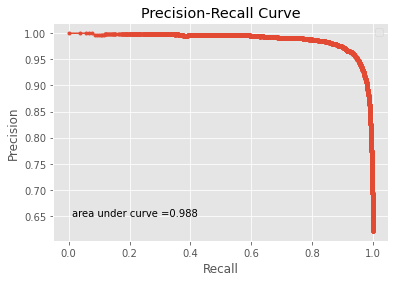

Threshold for splitting benign and malware is :  0.3387651


In [ ]:
#Plotting Precision-Recall Curve
from matplotlib import style
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

precision, recall, thresholds = precision_recall_curve(testY, y_predict)
area_uc = auc(recall, precision)
# summarize scores

print('NN: auc=%.3f' % (area_uc))
# plot the precision-recall curves
#no_skill = len(y_test[y_test==1]) / len(y_test)
style.use('ggplot')

pyplot.plot(recall, precision, marker='.')
pyplot.plot()
# axis labels
pyplot.text(0.01,0.65, 'area under curve =%.3f' % (area_uc))
pyplot.title('Precision-Recall Curve')
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()


prcsn = np.array(precision)
recl = np.array(recall)
f1_measure = 2*(prcsn*recl)/(prcsn+recl)
threshold = thresholds[np.argmax(f1_measure)]
print('Threshold for splitting benign and malware is : ',threshold)


In [ ]:
#Generating confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = np.zeros_like(y_predict)
y_idx = [y_predict >= 0.3387651]
y_pred[y_idx] = 1
conf_mtrx = confusion_matrix(testY, y_pred)
print(conf_mtrx)

[[3195  186]
 [ 166 3373]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  after removing the cwd from sys.path.


In [ ]:
#CAlcuating different evaluations
def different_evaluations(tn, fp, fn, tp, y_test, y_pred):
  # FPr and RNr
  FPr = fp/ (fp+tn)
  FNr = fn/ (fn+tp)
  print("False positive rate is : ", FPr)
  print("False negative rate is : ", FNr)
  # F1-score
  print("The F1-score is : ", f1_score(y_test, y_pred))

  # Recall
  print("The Recall is : ", recall_score(y_test, y_pred))

  # Precision
  print("The Precision score is : ", precision_score(y_test, y_pred))

In [ ]:
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

tn, fp, fn, tp = conf_mtrx.ravel()

different_evaluations(tn, fp, fn, tp, testY, y_pred)

False positive rate is :  0.04525288376220053
False negative rate is :  0.059621361966657245
The F1-score is :  0.9481481481481481
The Recall is :  0.9403786380333428
The Precision score is :  0.9560471128985923


Rough Work

In [ ]:
print(model.summary())

In [ ]:
trainX, testX, trainY, testY = train_test_split(images_data, Y, test_size=0.25)
history = model.fit(trainX, trainY, validation_split=0.1, batch_size=64, epochs=10)

Train on 16200 samples, validate on 1800 samples
Epoch 1/10
16200/16200 [==============================] - 219s 14ms/step - loss: 0.3386 - acc: 0.8566 - val_loss: 0.2875 - val_acc: 0.8739
Epoch 2/10
16200/16200 [==============================] - 219s 14ms/step - loss: 0.2770 - acc: 0.8881 - val_loss: 0.2746 - val_acc: 0.8839
Epoch 3/10
16200/16200 [==============================] - 219s 14ms/step - loss: 0.2386 - acc: 0.9063 - val_loss: 0.2332 - val_acc: 0.9067
Epoch 4/10
16200/16200 [==============================] - 221s 14ms/step - loss: 0.2164 - acc: 0.9169 - val_loss: 0.2535 - val_acc: 0.9028
Epoch 5/10
16200/16200 [==============================] - 219s 14ms/step - loss: 0.1851 - acc: 0.9301 - val_loss: 0.2217 - val_acc: 0.9122
Epoch 6/10
16200/16200 [==============================] - 218s 13ms/step - loss: 0.1715 - acc: 0.9338 - val_loss: 0.2179 - val_acc: 0.9167
Epoch 7/10
16200/16200 [==============================] - 220s 14ms/step - loss: 0.1639 - acc: 0.9378 - val_loss: 0.2

KeyboardInterrupt: ignored

In [ ]:
print(restored_model.layers[0].get_config())


{'batch_input_shape': (None, 64, 64, 3), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'input_1'}


In [ ]:
print(restored_model.layers[1].get_config())

{'name': 'normalization', 'trainable': True, 'dtype': 'float32', 'axis': -1}


In [ ]:
print(restored_model.layers[2].get_config())

{'name': 'conv2d', 'trainable': True, 'dtype': 'float32', 'filters': 32, 'kernel_size': (3, 3), 'strides': (1, 1), 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}


In [ ]:
m_4_22 = os.listdir('/content/gdrive/My Drive/Adverserial_ML/AndroZoo/APKs_and_Images/Malware_Images/Androguard_and_PreDefined_Values/Malware_Images_4K_22K_geq35')
print(len(m_4_22))

17962


In [ ]:
m_q15l35 = os.listdir('/content/gdrive/My Drive/Adverserial_ML/AndroZoo/APKs_and_Images/Malware_Images/Androguard_and_PreDefined_Values/Malware_Images_geq15l35')
print(len(m_q15l35))

31299


In [ ]:
m_q15l35_npy = load('/content/gdrive/My Drive/Adverserial_ML/AndroZoo/APKs_and_Images/Malware_Images/Androguard_and_PreDefined_Values/XMalware_geq15l35.npy') 
print(m_q15l35_npy.shape)

(31299, 64, 64, 3)
